In [10]:
import numpy as np

import pandas as pd

df = pd.read_csv('kidney_disease.csv')



df.drop('id',axis=1,inplace=True)


df.tail()

text = ['pcv','wc','rc']
for i in text:
  print(f"{i} : {df[i].dtype}")

def convertion(df,column):
  df[column] = pd.to_numeric(df[column],errors='coerce')

for column in text:
  convertion(df,column)
  print(f"{column}:{df[column].dtype}")



pcv : object
wc : object
rc : object
pcv:float64
wc:float64
rc:float64


,count
classification,
ckd,248
notckd,150
ckd\t,2


In [ ]:
def mean(df,column):
  means = df[column].mean()
  df[column] = df[column].fillna(mean)

def mode(df,column):
  mde = df[column].mode()[0]
  df[column] = df[column].fillna(mode)


num_col = [col for col in df.columns if df[col].dtype != 'object']

for col_name in num_col:
  mean(df,col_name)

ncat_col = [col for col in df.columns if df[col].dtype == 'object']

for col_name in ncat_col:
  mode(df,col_name)



In [ ]:
df.head()

df['dm'] = df['dm'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
df['cad'] = df['cad'].replace(to_replace='\tno',value='no')
df['classification'] = df['classification'].replace(to_replace='ckd\t',value='ckd')
df['rc'] = df['rc'].replace(to_replace='\t?',value=np.nan)
df['wc'] = df['wc'].replace(to_replace='\t?',value=np.nan)
df['pcv'] = df['pcv'].replace(to_replace='\t?',value=np.nan)


df['rbc'] = df['rbc'].replace(to_replace='\t?',value=np.nan)
df['pc'] = df['pc'].replace(to_replace='\t?',value=np.nan)
df['htn'] = df['htn'].replace(to_replace='\t?',value=np.nan)
df['appet'] = df['appet'].replace(to_replace='\t?',value=np.nan)
df['ba'] = df['ba'].replace(to_replace='\t?',value=np.nan)
df['pcc'] = df['pcc'].replace(to_replace='\t?',value=np.nan)

print(df['classification'].unique())
print(df['dm'].unique())
print(df['cad'].unique())






['ckd' 'notckd']
[nan]
[nan]


In [ ]:
df['dm'] = df['dm'].map({'no':0,'yes':1})
df['cad'] = df['cad'].map({'no':0,'yes':1})
df['pe'] = df['pe'].map({'no':0,'yes':1})
df['ane'] = df['ane'].map({'no':0,'yes':1})
df['appet'] = df['appet'].map({'good':0,'poor':1})
df['htn'] = df['htn'].map({'no':0,'yes':1})
df['ba'] = df['ba'].map({'no':0,'present':1})
df['pcv'] = df['pcv'].map({'no':0,'abnormal':1}) # Assuming 'no' maps to 0 for 'pcv'
df['rbc'] = df['rbc'].map({'normal':0,'abnormal':1})
df['pcc'] = df['pcc'].map({'no':0,'present':1})
df['pc'] = df['pc'].map({'normal':0,'abnormal':1})

df.head(5)
df['classification'].value_counts()

NameError: name 'df' is not defined

 print(f"{i} : {df[i].dtype}")   for get i varaible and get variabe data


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

ValueError: could not convert string to float: 'normal'

<Figure size 1000x1000 with 0 Axes>

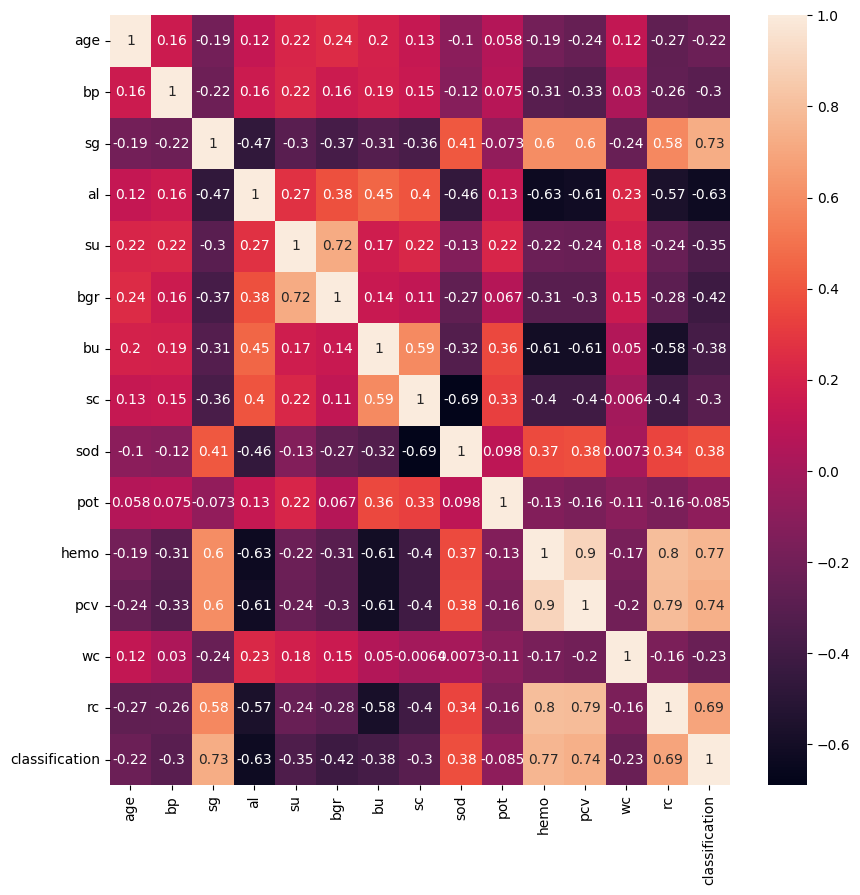

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame

# ... (Your previous code to load and preprocess the data) ...

# Convert 'classification' to numerical using label encoding if needed
# For example:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['classification'] = le.fit_transform(df['classification'])

# Before creating the heatmap, select only numerical columns for correlation
numerical_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_df.corr(), annot=True)
plt.show()

In [15]:
target = df.corr()['classification'].abs().sort_values(ascending=False)[0]

ValueError: could not convert string to float: 'normal'

ValueError: could not convert string to float: 'normal'

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# ... (Your previous code to load and preprocess the data) ...

# Convert 'classification' to numerical using label encoding if needed
le = LabelEncoder()
df['classification'] = le.fit_transform(df['classification'])

# Convert all object type columns to numerical using Label Encoding
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col]) # Fit and transform each object column separately


# Now you can calculate the correlation matrix without errors
target = df.corr()['classification'].abs().sort_values(ascending=False)[1:]

df['classification'].value_counts()
# ... (Rest of your code) ...

,count
classification,
0,248
2,150
1,2


In [21]:
from sklearn.model_selection import train_test_split
x = df.drop("classification",axis=1)
y = df['classification']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=25)

print(f"x_train : {x_train.shape}")
print(f"x_test : {x_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

x_train : (300, 24)
x_test : (100, 24)
y_train : (300,)
y_test : (100,)


In [22]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
predict = model.predict(x_test)
predict

array([0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2,
       2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0])

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [31]:
fg = []
fg.append(('naive bayes',GaussianNB()))
fg.append(('knn',KNeighborsClassifier(n_neighbors=8)))
fg.append(('random forest',RandomForestClassifier()))
fg.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
fg.append(('svm',SVC(kernel='linear')))

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score

In [32]:
for name,model in fg:
  print(name, model)
  print()
  fg.fit(x_train,y_train)
  predict = fg.predict(x_test)
  print(accuracy_score(y_test,predict))
  print('\n')
  print(confusion_matrix(y_test,predict))
  print('\n')
  print(classification_report(y_test,predict))
  print('\n')
  print(f1_score(y_test,predict))
  print('\n')
  print(precision_score(y_test,predict))
  print('\n')
  print(recall_score(y_test,predict))


naive bayes GaussianNB()



AttributeError: 'list' object has no attribute 'fit'

In [33]:
for name,model in fg:
  print(name, model)
  print()
  model.fit(x_train,y_train) # Call fit on the model object, not the list
  predict = model.predict(x_test) # Call predict on the model object, not the list
  print(accuracy_score(y_test,predict))
  print('\n')
  print(confusion_matrix(y_test,predict))
  print('\n')
  print(classification_report(y_test,predict))
  print('\n')
  print(f1_score(y_test,predict))
  print('\n')
  print(precision_score(y_test,predict))
  print('\n')
  print(recall_score(y_test,predict))

naive bayes GaussianNB()



ValueError: Input X contains NaN.
GaussianNB does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer

# ... (your existing code to load and preprocess data) ...

# Before splitting the data
# Create an imputer to replace NaN with the mean of each column
imputer = SimpleImputer(strategy='mean')  # or strategy='median', etc.

# Fit the imputer on the numerical features of your training data and transform
x_train_num = x_train.select_dtypes(include=np.number) # Select numerical columns
x_test_num = x_test.select_dtypes(include=np.number)   # Select numerical columns

x_train_imputed = imputer.fit_transform(x_train_num)
x_test_imputed = imputer.transform(x_test_num)

# Update the original DataFrame with the imputed values
x_train.loc[:, x_train_num.columns] = x_train_imputed
x_test.loc[:, x_test_num.columns] = x_test_imputed

# ... (rest of your code, including model training) ...
for name,model in fg:
  print(name, model)
  print()
  model.fit(x_train,y_train) # Call fit on the model object, not the list
  predict = model.predict(x_test) # Call predict on the model object, not the list
  print(accuracy_score(y_test,predict))
  print('\n')
  print(confusion_matrix(y_test,predict))
  print('\n')
  print(classification_report(y_test,predict))
  print('\n')
  print(f1_score(y_test,predict))
  print('\n')
  print(precision_score(y_test,predict))
  print('\n')
  print(recall_score(y_test,predict))

naive bayes GaussianNB()

0.92


[[58  0  4]
 [ 1  0  0]
 [ 3  0 34]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        62
           1       0.00      0.00      0.00         1
           2       0.89      0.92      0.91        37

    accuracy                           0.92       100
   macro avg       0.61      0.62      0.61       100
weighted avg       0.91      0.92      0.92       100





/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

imputer = SimpleImputer(strategy='mean')  # or strategy='median', etc.

# Fit the imputer on the numerical features of your training data and transform
x_train_num = x_train.select_dtypes(include=np.number) # Select numerical columns
x_test_num = x_test.select_dtypes(include=np.number)   # Select numerical columns

x_train_imputed = imputer.fit_transform(x_train_num)
x_test_imputed = imputer.transform(x_test_num)

# Update the original DataFrame with the imputed values
x_train.loc[:, x_train_num.columns] = x_train_imputed
x_test.loc[:, x_test_num.columns] = x_test_imputed

In [36]:
for name,model in fg:
  print(name, model)
  print()
  model.fit(x_train,y_train) # Call fit on the model object, not the list
  predict = model.predict(x_test) # Call predict on the model object, not the list
  print(accuracy_score(y_test,predict))
  print('\n')
  print(confusion_matrix(y_test,predict))
  print('\n')
  print(classification_report(y_test,predict))
  print('\n')
  # Set average='weighted' for multiclass classification
  print(f1_score(y_test,predict, average='weighted'))
  print('\n')
  print(precision_score(y_test,predict, average='weighted'))
  print('\n')
  print(recall_score(y_test,predict, average='weighted'))

naive bayes GaussianNB()

0.92


[[58  0  4]
 [ 1  0  0]
 [ 3  0 34]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        62
           1       0.00      0.00      0.00         1
           2       0.89      0.92      0.91        37

    accuracy                           0.92       100
   macro avg       0.61      0.62      0.61       100
weighted avg       0.91      0.92      0.92       100



0.9154666666666667


0.9110526315789474


0.92
knn KNeighborsClassifier(n_neighbors=8)



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

0.72


[[50  0 12]
 [ 0  0  1]
 [15  0 22]]


              precision    recall  f1-score   support

           0       0.77      0.81      0.79        62
           1       0.00      0.00      0.00         1
           2       0.63      0.59      0.61        37

    accuracy                           0.72       100
   macro avg       0.47      0.47      0.47       100
weighted avg       0.71      0.72      0.71       100



0.714300087489064


0.7094945054945054


0.72
random forest RandomForestClassifier()



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.97


[[62  0  0]
 [ 1  0  0]
 [ 2  0 35]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.98        62
           1       0.00      0.00      0.00         1
           2       1.00      0.95      0.97        37

    accuracy                           0.97       100
   macro avg       0.65      0.65      0.65       100
weighted avg       0.96      0.97      0.97       100



0.9650765529308836


0.9613846153846154


0.97
DecisionTreeClassifier DecisionTreeClassifier()

0.95


[[61  0  1]
 [ 1  0  0]
 [ 3  0 34]]


              precision    recall  f1-score   support

           0       0.94      0.98      0.96        62
           1       0.00      0.00      0.00         1
           2       0.97      0.92      0.94        37

    accuracy                           0.95       100
   macro avg       0.64      0.63      0.64       100
weighted avg       0.94      0.95      0.95       100



0.9450349956255468


0.9412747252747252


0.95

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

0.92


[[58  1  3]
 [ 1  0  0]
 [ 3  0 34]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        62
           1       0.00      0.00      0.00         1
           2       0.92      0.92      0.92        37

    accuracy                           0.92       100
   macro avg       0.62      0.62      0.62       100
weighted avg       0.92      0.92      0.92       100



0.92


0.92


0.92
